In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [21]:
title_basics = pd.read_csv('./Data/imdb.title.basics.csv.gz')
title_ratings = pd.read_csv("./Data/imdb.title.ratings.csv.gz")
movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv.gz')

In [22]:
title_basics.rename(columns = {'primary_title':'movie'}, inplace = True)
title_basics.drop(columns = ["original_title","runtime_minutes"], inplace=True)

In [23]:
title_basics['genres'].isna().sum()/146144*100

3.7004598204510617

In [24]:
title_basics.dropna(subset= ['genres'], inplace = True)

In [25]:
#movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [26]:
movie_budgets["release_year"]= [x[7:] for x in movie_budgets["release_date"]]
movie_budgets["release_month"]= [x[:4] for x in movie_budgets["release_date"]]

#for the purpose of graphing, edited each month with numeric values in the beginning 
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Jan", "01 Jan")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Feb", "02 Feb")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Mar", "03 Mar")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Apr", "04 Apr")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("May", "05 May")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Jun", "06 Jun")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Jul", "07 Jul")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Aug", "08 Aug")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Sep", "09 Sep")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Oct", "10 Oct")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Nov", "11 Nov")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Dec", "12 Dec")

In [27]:
# change production_budget, domestic_gross, and worldwide_budget to integers
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [28]:
movie_budgets.drop(columns = ["id"], inplace=True)
# drop rows where worldwide_gross or production_budget is 0
movie_budgets = movie_budgets[movie_budgets.worldwide_gross != 0]
movie_budgets = movie_budgets[movie_budgets.production_budget != 0]

In [29]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
movie_budgets['profit_million']=(movie_budgets['profit']/1000000)
movie_budgets['production_budget_million']=(movie_budgets['production_budget']/1000000)
movie_budgets['ROI'] = (movie_budgets['profit'] / movie_budgets['production_budget']) * 100
movie_budgets = movie_budgets.round({'ROI': 2})
movie_budgets['year'] = pd.DatetimeIndex(movie_budgets['release_date']).year

In [30]:
movie_budgets.loc[movie_budgets['movie']== 'The Gambler']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year
2224,"Dec 10, 2014",The Gambler,25000000.0,33680992.0,38718031.0,2014,12 Dec,13718031.0,13.718031,25.0,54.87,2014
4749,"Aug 4, 1999",The Gambler,3000000.0,51773.0,101773.0,1999,08 Aug,-2898227.0,-2.898227,3.0,-96.61,1999


# Merge Data Tables 

In [31]:
imdb_data = pd.merge(title_basics, title_ratings, how = 'inner', on = 'tconst')
imdb_data
#imdb_data.loc[imdb_data['movie']== 'The Gambler']

,tconst,movie,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,2019,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,2019,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73050,tt9914642,Albatross,2017,Documentary,8.5,8


In [32]:
mdf = pd.merge(imdb_data, movie_budgets, how = 'inner', on = 'movie')
mdf
mdf.loc[mdf['movie']== 'The Gambler']

,tconst,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year
1242,tt1828325,The Gambler,2015,Drama,7.0,10,"Dec 10, 2014",25000000.0,33680992.0,38718031.0,2014,12 Dec,13718031.0,13.718031,25.0,54.87,2014
1243,tt1828325,The Gambler,2015,Drama,7.0,10,"Aug 4, 1999",3000000.0,51773.0,101773.0,1999,08 Aug,-2898227.0,-2.898227,3.0,-96.61,1999
1244,tt2039393,The Gambler,2014,"Crime,Drama,Thriller",6.0,59995,"Dec 10, 2014",25000000.0,33680992.0,38718031.0,2014,12 Dec,13718031.0,13.718031,25.0,54.87,2014
1245,tt2039393,The Gambler,2014,"Crime,Drama,Thriller",6.0,59995,"Aug 4, 1999",3000000.0,51773.0,101773.0,1999,08 Aug,-2898227.0,-2.898227,3.0,-96.61,1999
1246,tt2843832,The Gambler,2013,Documentary,7.6,14,"Dec 10, 2014",25000000.0,33680992.0,38718031.0,2014,12 Dec,13718031.0,13.718031,25.0,54.87,2014
1247,tt2843832,The Gambler,2013,Documentary,7.6,14,"Aug 4, 1999",3000000.0,51773.0,101773.0,1999,08 Aug,-2898227.0,-2.898227,3.0,-96.61,1999
1248,tt2924336,The Gambler,2013,"Drama,Thriller",7.2,1479,"Dec 10, 2014",25000000.0,33680992.0,38718031.0,2014,12 Dec,13718031.0,13.718031,25.0,54.87,2014
1249,tt2924336,The Gambler,2013,"Drama,Thriller",7.2,1479,"Aug 4, 1999",3000000.0,51773.0,101773.0,1999,08 Aug,-2898227.0,-2.898227,3.0,-96.61,1999
1250,tt9447594,The Gambler,2019,"Action,Sci-Fi,Thriller",6.1,10,"Dec 10, 2014",25000000.0,33680992.0,38718031.0,2014,12 Dec,13718031.0,13.718031,25.0,54.87,2014
1251,tt9447594,The Gambler,2019,"Action,Sci-Fi,Thriller",6.1,10,"Aug 4, 1999",3000000.0,51773.0,101773.0,1999,08 Aug,-2898227.0,-2.898227,3.0,-96.61,1999


In [33]:
mdf=mdf.sort_values(by='numvotes', ascending = False)
#mdf.loc[mdf['movie']== 'The Gambler']

In [34]:
mdf['same_year']= mdf['start_year']-mdf['year']
mdf = mdf.loc[mdf['same_year']== 0]
#mdf.loc[mdf['movie']== 'The Gambler']

In [35]:
mdf = mdf.drop_duplicates(subset='movie')
mdf.drop(columns = ["tconst"], inplace=True)

In [36]:
mdf["genres"] = mdf["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

In [39]:
# filter for movies released after 1990 
mdf = mdf.loc[mdf['year'] >= 2010]

In [65]:
mdf2 = mdf.explode('genres')
mdf2_no_gallow = mdf2.drop(index = 1722).sort_values(by="ROI",ascending = False)

In [66]:
mdf2_no_gallow

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year,same_year
782,The Devil Inside,2012,Horror,4.2,33522,"Jan 6, 2012",1000000.0,53262945.0,101759490.0,2012,01 Jan,100759490.0,100.759490,1.000,10075.95,2012,0
755,Paranormal Activity 2,2010,Horror,5.7,93122,"Oct 20, 2010",3000000.0,84752907.0,177512032.0,2010,10 Oct,174512032.0,174.512032,3.000,5817.07,2010,0
2402,Get Out,2017,Horror,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.000,5007.36,2017,0
2402,Get Out,2017,Mystery,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.000,5007.36,2017,0
2402,Get Out,2017,Thriller,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.000,5007.36,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,Broken Horses,2015,Drama,5.7,1957,"Sep 1, 2015",15000000.0,0.0,3471.0,2015,09 Sep,-14996529.0,-14.996529,15.000,-99.98,2015,0
1590,Food Chains,2014,Documentary,7.2,328,"Nov 21, 2014",913000.0,0.0,176.0,2014,11 Nov,-912824.0,-0.912824,0.913,-99.98,2014,0
2368,American Hero,2015,Action,4.9,3661,"Dec 11, 2015",1000000.0,0.0,26.0,2015,12 Dec,-999974.0,-0.999974,1.000,-100.00,2015,0
2368,American Hero,2015,Comedy,4.9,3661,"Dec 11, 2015",1000000.0,0.0,26.0,2015,12 Dec,-999974.0,-0.999974,1.000,-100.00,2015,0


In [67]:
top_five_list = ["Horror", "Mystery", "Thriller", "Sci-Fi", "Animation"]
mdf2_top_five = mdf2_no_gallow.loc[mdf2_no_gallow['genres'].isin(top_five_list)] 
mean_ROI_by_month = mdf2_top_five.groupby("release_month").mean()

In [68]:
mdf2['ROI'].sort_values( ascending = False)
mdf2.drop(index =1722)

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year,same_year
510,Inception,2010,Action,8.8,1841066,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,2010,07 Jul,675524642.0,675.524642,160.000,422.20,2010,0
510,Inception,2010,Adventure,8.8,1841066,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,2010,07 Jul,675524642.0,675.524642,160.000,422.20,2010,0
510,Inception,2010,Sci-Fi,8.8,1841066,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,2010,07 Jul,675524642.0,675.524642,160.000,422.20,2010,0
477,The Dark Knight Rises,2012,Action,8.4,1387769,"Jul 20, 2012",275000000.0,448139099.0,1.084439e+09,2012,07 Jul,809439099.0,809.439099,275.000,294.34,2012,0
477,The Dark Knight Rises,2012,Thriller,8.4,1387769,"Jul 20, 2012",275000000.0,448139099.0,1.084439e+09,2012,07 Jul,809439099.0,809.439099,275.000,294.34,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,Destiny,2014,Romance,7.8,36,"Dec 31, 2014",750000.0,0.0,4.500000e+02,2014,12 Dec,-749550.0,-0.749550,0.750,-99.94,2014,0
1481,The Great Wall,2017,Documentary,6.5,24,"Feb 17, 2017",150000000.0,45157105.0,3.344869e+08,2017,02 Feb,184486852.0,184.486852,150.000,122.99,2017,0
2308,Emily,2017,Drama,6.8,13,"Jan 27, 2017",27000.0,3547.0,3.547000e+03,2017,01 Jan,-23453.0,-0.023453,0.027,-86.86,2017,0
1931,All You Need Is Love,2014,Documentary,6.8,9,"Oct 31, 2014",300000.0,0.0,3.565259e+06,2014,10 Oct,3265259.0,3.265259,0.300,1088.42,2014,0


In [69]:
sorted_genres = mdf2.groupby(["genres"], as_index=False).mean().sort_values(by = "ROI", ascending=False)

top5genres = list(sorted_genres['genres'].values[0:5])
top5genres

['Horror', 'Mystery', 'Thriller', 'Sci-Fi', 'Animation']

In [70]:
sorted_genres.shape

(21, 13)

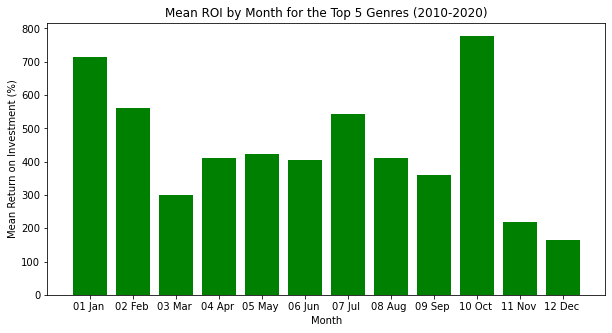

In [71]:
height = mean_ROI_by_month['ROI']
x = range(12)
labels = mean_ROI_by_month.index

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Month for the Top 5 Genres (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month");

In [72]:
mdf2_Horror = mdf2[mdf2["genres"]== "Horror"]
mdf2_Mystery = mdf2[mdf2["genres"]== "Mystery"]
mdf2_Thriller = mdf2[mdf2["genres"]== "Thriller"]
mdf2_Sci_Fi = mdf2[mdf2["genres"]== "Music"]
mdf2_Animation = mdf2[mdf2["genres"]== "Sci-Fi"]

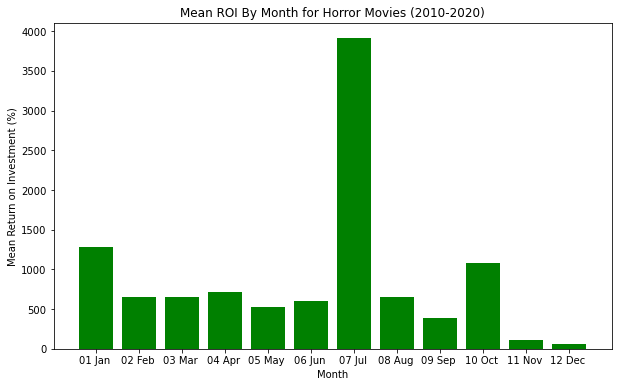

In [73]:
mdf2_Horror_Grouped = mdf2_Horror.groupby(["release_month"], as_index=False).mean()
mdf2_Horror_Grouped = mdf2_Horror_Grouped.set_index("release_month")

height = mdf2_Horror_Grouped['ROI']
x = range(12)
labels = mdf2_Horror_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Horror Movies (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month");

In [74]:
mdf2_Horror_WeekName.shape

(6, 12)

<ipython-input-75-e58f04b45267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Horror['converted'] = pd.to_datetime(pd.Series(mdf2_Horror["release_date"]))
<ipython-input-75-e58f04b45267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Horror["day of the week"] = mdf2_Horror["converted"].dt.day_name()


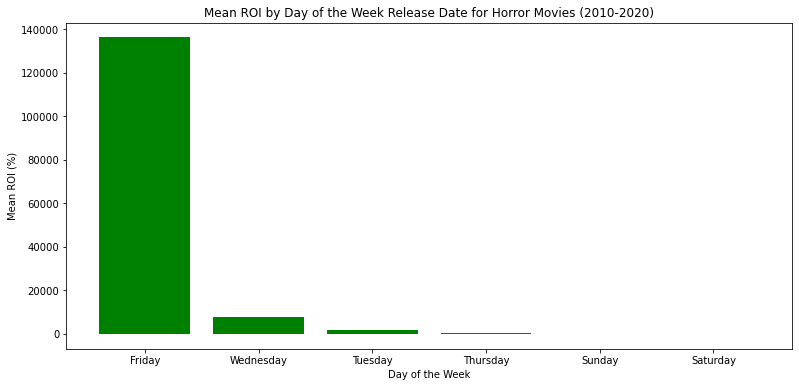

In [75]:
mdf2_Horror['converted'] = pd.to_datetime(pd.Series(mdf2_Horror["release_date"]))
mdf2_Horror["day of the week"] = mdf2_Horror["converted"].dt.day_name()
mdf2_Horror_WeekName = mdf2_Horror.groupby("day of the week").sum()
mdf2_Horror_WeekName = mdf2_Horror_WeekName.sort_values("ROI", ascending=False)

height = mdf2_Horror_WeekName['ROI']
x = range(6)
labels = mdf2_Horror_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Horror Movies (2010-2020)")
ax.set_ylabel("Mean ROI (%)")
ax.set_xlabel("Day of the Week");


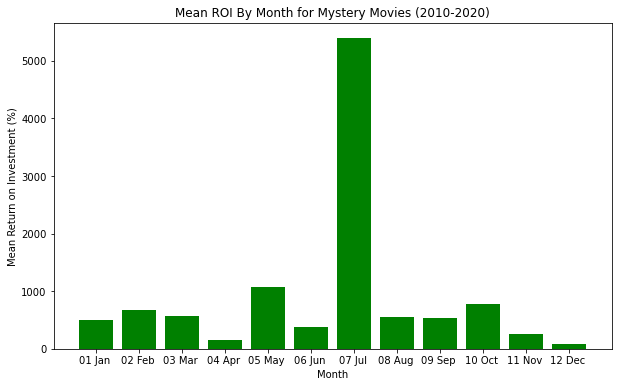

In [76]:
mdf2_Mystery_Grouped = mdf2_Mystery.groupby(["release_month"], as_index=False).mean()
mdf2_Mystery_Grouped = mdf2_Mystery_Grouped.set_index("release_month")

height = mdf2_Mystery_Grouped['ROI']
x = range(12)
labels = mdf2_Mystery_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Mystery Movies (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month");

<ipython-input-77-056b21c98626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Mystery['converted'] = pd.to_datetime(pd.Series(mdf2_Mystery["release_date"]))
<ipython-input-77-056b21c98626>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Mystery["day of the week"] = mdf2_Mystery["converted"].dt.day_name()


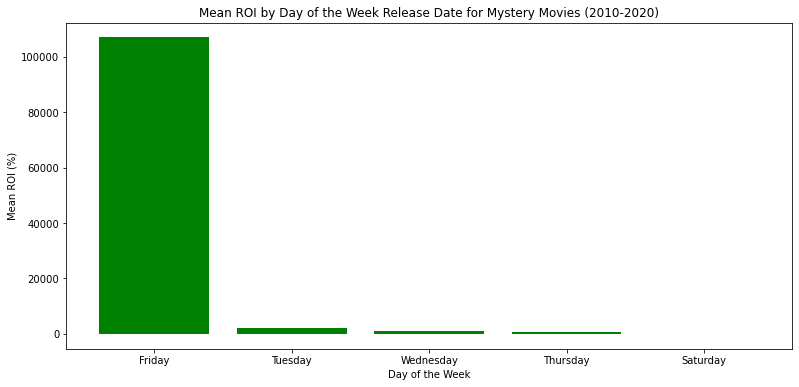

In [77]:
mdf2_Mystery['converted'] = pd.to_datetime(pd.Series(mdf2_Mystery["release_date"]))
mdf2_Mystery["day of the week"] = mdf2_Mystery["converted"].dt.day_name()
mdf2_Mystery_WeekName = mdf2_Mystery.groupby("day of the week").sum()
mdf2_Mystery_WeekName = mdf2_Mystery_WeekName.sort_values("ROI", ascending=False)

height = mdf2_Mystery_WeekName['ROI']
x = range(5)
labels = mdf2_Mystery_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Mystery Movies (2010-2020)")
ax.set_ylabel("Mean ROI (%)")
ax.set_xlabel("Day of the Week");

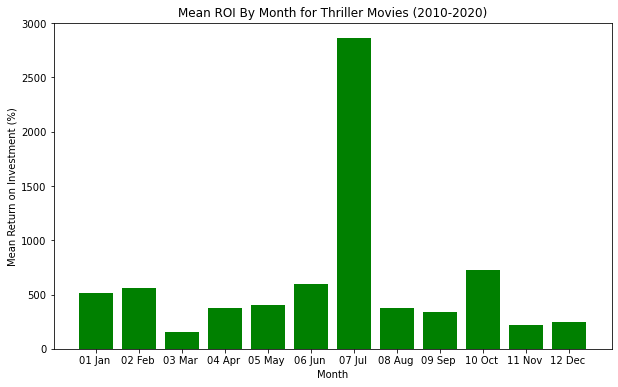

In [78]:
mdf2_Thriller_Grouped = mdf2_Thriller.groupby(["release_month"], as_index=False).mean()
mdf2_Thriller_Grouped = mdf2_Thriller_Grouped.set_index("release_month")

height = mdf2_Thriller_Grouped['ROI']
x = range(12)
labels = mdf2_Thriller_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Thriller Movies (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month");

<ipython-input-79-3cbaab2053c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Thriller['converted'] = pd.to_datetime(pd.Series(mdf2_Thriller["release_date"]))
<ipython-input-79-3cbaab2053c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Thriller["day of the week"] = mdf2_Thriller["converted"].dt.day_name()


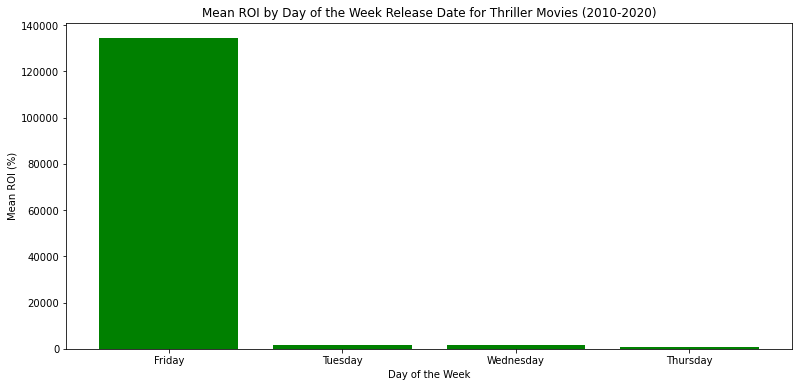

In [79]:
mdf2_Thriller['converted'] = pd.to_datetime(pd.Series(mdf2_Thriller["release_date"]))
mdf2_Thriller["day of the week"] = mdf2_Thriller["converted"].dt.day_name()
mdf2_Thriller_WeekName = mdf2_Thriller.groupby("day of the week").sum()
mdf2_Thriller_WeekName = mdf2_Thriller_WeekName.sort_values("ROI", ascending=False)

height = mdf2_Thriller_WeekName['ROI']
x = range(4)
labels = mdf2_Thriller_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Thriller Movies (2010-2020)")
ax.set_ylabel("Mean ROI (%)")
ax.set_xlabel("Day of the Week");

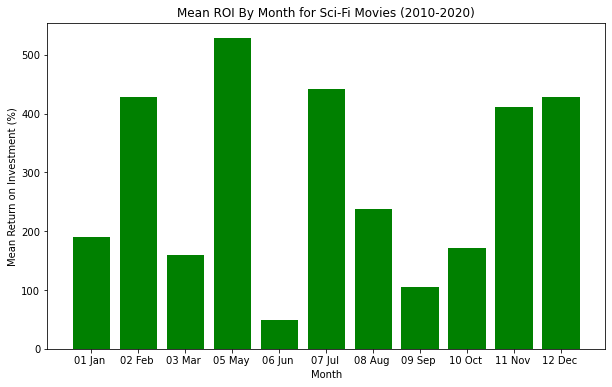

In [80]:
mdf2_Sci_Fi_Grouped = mdf2_Sci_Fi.groupby(["release_month"], as_index=False).mean()
mdf2_Sci_Fi_Grouped = mdf2_Sci_Fi_Grouped.set_index("release_month")

height = mdf2_Sci_Fi_Grouped['ROI']
x = range(11)
labels = mdf2_Sci_Fi_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Sci-Fi Movies (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month");

<ipython-input-81-ec5e7b7fcf6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Sci_Fi['converted'] = pd.to_datetime(pd.Series(mdf2_Sci_Fi["release_date"]))
<ipython-input-81-ec5e7b7fcf6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Sci_Fi["day of the week"] = mdf2_Sci_Fi["converted"].dt.day_name()


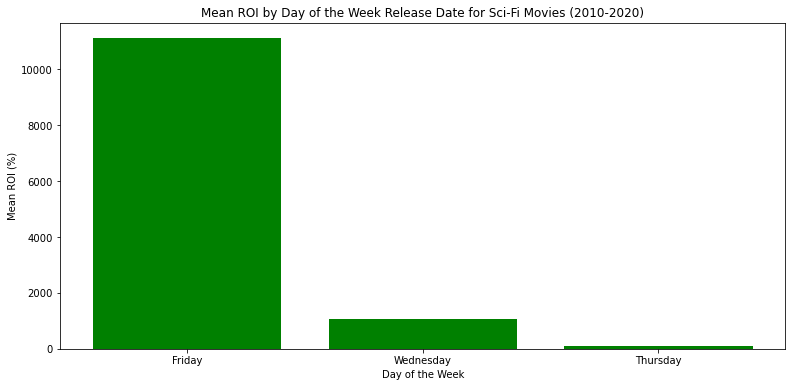

In [81]:
mdf2_Sci_Fi['converted'] = pd.to_datetime(pd.Series(mdf2_Sci_Fi["release_date"]))
mdf2_Sci_Fi["day of the week"] = mdf2_Sci_Fi["converted"].dt.day_name()
mdf2_Sci_Fi_WeekName = mdf2_Sci_Fi.groupby("day of the week").sum()
mdf2_Sci_Fi_WeekName = mdf2_Sci_Fi_WeekName.sort_values("ROI", ascending=False)

height = mdf2_Sci_Fi_WeekName['ROI']
x = range(3)
labels = mdf2_Sci_Fi_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Sci-Fi Movies (2010-2020)")
ax.set_ylabel("Mean ROI (%)")
ax.set_xlabel("Day of the Week");

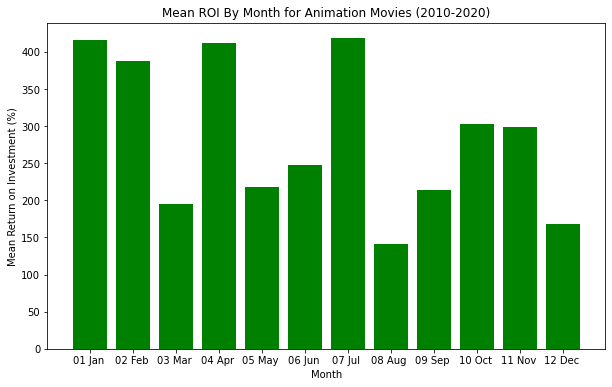

In [82]:
mdf2_Animation_Grouped = mdf2_Animation.groupby(["release_month"], as_index=False).mean()
mdf2_Animation_Grouped = mdf2_Animation_Grouped.set_index("release_month")

height = mdf2_Animation_Grouped['ROI']
x = range(12)
labels = mdf2_Animation_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Animation Movies (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month");

<ipython-input-83-7d93ea704267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Animation['converted'] = pd.to_datetime(pd.Series(mdf2_Animation["release_date"]))
<ipython-input-83-7d93ea704267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Animation["day of the week"] = mdf2_Animation["converted"].dt.day_name()


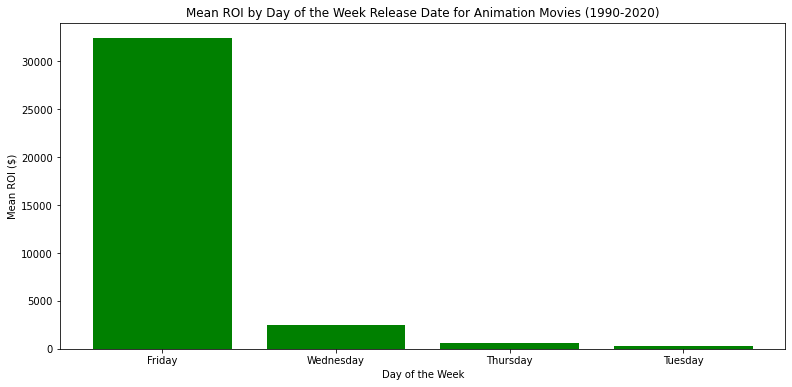

In [83]:
mdf2_Animation['converted'] = pd.to_datetime(pd.Series(mdf2_Animation["release_date"]))
mdf2_Animation["day of the week"] = mdf2_Animation["converted"].dt.day_name()
mdf2_Animation_WeekName = mdf2_Animation.groupby("day of the week").sum()
mdf2_Animation_WeekName = mdf2_Animation_WeekName.sort_values("ROI", ascending=False)

height = mdf2_Animation_WeekName['ROI']
x = range(4)
labels = mdf2_Animation_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Animation Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

# old codes--ignore again

In [85]:
mdf2 = mdf.copy()
mdf2['production_budget'] = mdf2['production_budget'].map(lambda x: x.lstrip('$'))
mdf2['domestic_gross'] = mdf2['domestic_gross'].map(lambda x: x.lstrip('$'))
mdf2['worldwide_gross'] = mdf2['worldwide_gross'].map(lambda x: x.lstrip('$'))

AttributeError: 'float' object has no attribute 'lstrip'

In [ ]:
mdf2['production_budget']=mdf2['production_budget'].str.replace(',','')
mdf2['domestic_gross']=mdf2['domestic_gross'].str.replace(',','')
mdf2['worldwide_gross']=mdf2['worldwide_gross'].str.replace(',','')

In [ ]:
mdf2 = mdf2.astype({'production_budget': 'int64'})
mdf2 = mdf2.astype({'domestic_gross': 'int64'})
mdf2 = mdf2.astype({'worldwide_gross': 'int64'})

In [ ]:
mdf2 = mdf2[mdf2.worldwide_gross != 0]
mdf2 = mdf2[mdf2.domestic_gross != 0]

In [ ]:
mdf2['profit'] = mdf2['worldwide_gross'] - mdf2['production_budget']
mdf2['ROI'] = (mdf2['profit'] / mdf2['production_budget']) * 100
mdf2 = mdf2.round({'ROI': 2})

In [ ]:
mdf2["release_year"]= [x[7:] for x in mdf2["release_date"]]
mdf2["release_month"]= [x[:4] for x in mdf2["release_date"]]

In [ ]:
#for the purpose of graphing, edited each month with numeric values in the beginning 
mdf2["release_month"] = mdf2["release_month"].str.replace("Jan", "01 Jan")
mdf2["release_month"] = mdf2["release_month"].str.replace("Feb", "02 Feb")
mdf2["release_month"] = mdf2["release_month"].str.replace("Mar", "03 Mar")
mdf2["release_month"] = mdf2["release_month"].str.replace("Apr", "04 Apr")
mdf2["release_month"] = mdf2["release_month"].str.replace("May", "05 May")
mdf2["release_month"] = mdf2["release_month"].str.replace("Jun", "06 Jun")
mdf2["release_month"] = mdf2["release_month"].str.replace("Jul", "07 Jul")
mdf2["release_month"] = mdf2["release_month"].str.replace("Aug", "08 Aug")
mdf2["release_month"] = mdf2["release_month"].str.replace("Sep", "09 Sep")
mdf2["release_month"] = mdf2["release_month"].str.replace("Oct", "10 Oct")
mdf2["release_month"] = mdf2["release_month"].str.replace("Nov", "11 Nov")
mdf2["release_month"] = mdf2["release_month"].str.replace("Dec", "12 Dec")

In [ ]:
mdf2=mdf2.loc[mdf2['release_year'] >= '1990']

In [ ]:
mdf2

In [ ]:
gf = mdf2[['movie', 'genres', 'production_budget', 'domestic_gross', 'worldwide_gross', 'profit', 'ROI', "release_month", 'release_year', "release_date"]]

In [ ]:
gf['genres'] = gf['genres'].str.split(',')

In [ ]:
gf = gf.explode('genres')
gf

In [ ]:
new_gf1 = gf[['movie', 'genres','ROI', "profit", 'release_year', "release_month", "release_date"]]
mean_ROI_by_month = new_gf1.groupby("release_month").mean()
mean_ROI_by_month 

In [ ]:
new_gf1_Horror = new_gf1[new_gf1["genres"]== "Horror"]
new_gf1_Mystery = new_gf1[new_gf1["genres"]== "Mystery"]
new_gf1_Thriller = new_gf1[new_gf1["genres"]== "Thriller"]
new_gf1_Music = new_gf1[new_gf1["genres"]== "Music"]
new_gf1_Sci_Fi = new_gf1[new_gf1["genres"]== "Sci-Fi"]

In [ ]:
new_gf2 = new_gf1.groupby(["genres"], as_index=False).mean()
new_gf2 = new_gf2.sort_values(by = "ROI", ascending=False)
new_gf2

In [ ]:
height = mean_ROI_by_month['ROI']
x = range(12)
labels = mean_ROI_by_month .index

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Month (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

In [ ]:
new_gf1_Horror_Grouped = new_gf1_Horror.groupby(["release_month"], as_index=False).mean()
new_gf1_Horror_Grouped = new_gf1_Horror_Grouped.set_index("release_month")

height = new_gf1_Horror_Grouped['ROI']
x = range(12)
labels = new_gf1_Horror_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Horror Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

In [ ]:
new_gf1_Horror['converted'] = pd.to_datetime(pd.Series(new_gf1_Horror["release_date"]))
new_gf1_Horror["day of the week"] = new_gf1_Horror["converted"].dt.day_name()
new_gf1_Horror_WeekName = new_gf1_Horror.groupby("day of the week").sum()
new_gf1_Horror_WeekName = new_gf1_Horror_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Horror_WeekName['ROI']
x = range(4)
labels = new_gf1_Horror_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Horror Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

In [ ]:
new_gf1_Mystery_Grouped = new_gf1_Mystery.groupby(["release_month"], as_index=False).mean()
new_gf1_Mystery_Grouped = new_gf1_Mystery_Grouped.set_index("release_month")

height = new_gf1_Mystery_Grouped['ROI']
x = range(11)
labels = new_gf1_Mystery_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Mystery Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

In [ ]:
new_gf1_Mystery['converted'] = pd.to_datetime(pd.Series(new_gf1_Mystery["release_date"]))
new_gf1_Mystery["day of the week"] = new_gf1_Mystery["converted"].dt.day_name()
new_gf1_Mystery_WeekName = new_gf1_Mystery.groupby("day of the week").sum()
new_gf1_Mystery_WeekName = new_gf1_Mystery_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Mystery_WeekName['ROI']
x = range(3)
labels = new_gf1_Mystery_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Mystery Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

In [ ]:
new_gf1_Thriller_Grouped = new_gf1_Thriller.groupby(["release_month"], as_index=False).mean()
new_gf1_Thriller_Grouped = new_gf1_Thriller_Grouped.set_index("release_month")

height = new_gf1_Thriller_Grouped['ROI']
x = range(12)
labels = new_gf1_Thriller_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Thriller Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

In [ ]:
new_gf1_Thriller['converted'] = pd.to_datetime(pd.Series(new_gf1_Thriller["release_date"]))
new_gf1_Thriller["day of the week"] = new_gf1_Thriller["converted"].dt.day_name()
new_gf1_Thriller_WeekName = new_gf1_Thriller.groupby("day of the week").sum()
new_gf1_Thriller_WeekName = new_gf1_Thriller_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Thriller_WeekName['ROI']
x = range(3)
labels = new_gf1_Thriller_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Thriller Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

In [ ]:
new_gf1_Music_Grouped = new_gf1_Music.groupby(["release_month"], as_index=False).mean()
new_gf1_Music_Grouped = new_gf1_Music_Grouped.set_index("release_month")

height = new_gf1_Music_Grouped['ROI']
x = range(7)
labels = new_gf1_Music_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Music Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

In [ ]:
new_gf1_Music['converted'] = pd.to_datetime(pd.Series(new_gf1_Music["release_date"]))
new_gf1_Music["day of the week"] = new_gf1_Music["converted"].dt.day_name()
new_gf1_Music_WeekName = new_gf1_Music.groupby("day of the week").sum()
new_gf1_Music_WeekName = new_gf1_Music_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Music_WeekName['ROI']
x = range(3)
labels = new_gf1_Music_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Music Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

In [ ]:
new_gf1_Sci_Fi_Grouped = new_gf1_Sci_Fi.groupby(["release_month"], as_index=False).mean()
new_gf1_Sci_Fi_Grouped = new_gf1_Sci_Fi_Grouped.set_index("release_month")

height = new_gf1_Sci_Fi_Grouped['ROI']
x = range(11)
labels = new_gf1_Sci_Fi_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Sci-Fi Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

In [ ]:
new_gf1_Sci_Fi['converted'] = pd.to_datetime(pd.Series(new_gf1_Sci_Fi["release_date"]))
new_gf1_Sci_Fi["day of the week"] = new_gf1_Sci_Fi["converted"].dt.day_name()
new_gf1_Sci_Fi_WeekName = new_gf1_Sci_Fi.groupby("day of the week").sum()
new_gf1_Sci_Fi_WeekName = new_gf1_Sci_Fi_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Sci_Fi_WeekName['ROI']
x = range(3)
labels = new_gf1_Sci_Fi_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Sci_Fi Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

# old codes--ignore

In [ ]:
data1['production_budget'] = [row.replace('$','') for row in data1['production_budget']]
data1['production_budget'] = [row.replace(',','') for row in data1['production_budget']]

data1['domestic_gross'] = [row.replace('$','') for row in data1['domestic_gross']]
data1['domestic_gross'] = [row.replace(',','') for row in data1['domestic_gross']]

data1['worldwide_gross'] = [row.replace('$','') for row in data1['worldwide_gross']]
data1['worldwide_gross'] = [row.replace(',','') for row in data1['worldwide_gross']]




data1['domestic_gross'] = [int(row) for row in data1['domestic_gross']]
data1['production_budget'] = [int(row) for row in data1['production_budget']]
data1['worldwide_gross'] = [int(row) for row in data1['worldwide_gross']]

data1['revenue'] = data1['domestic_gross']- data1['production_budget']

In [ ]:
#for the purpose of graphing, edited each month with numeric values in the beginning 
data1["release_month"] = data1["release_month"].str.replace("Jan", "01 Jan")
data1["release_month"] = data1["release_month"].str.replace("Feb", "02 Feb")
data1["release_month"] = data1["release_month"].str.replace("Mar", "03 Mar")
data1["release_month"] = data1["release_month"].str.replace("Apr", "04 Apr")
data1["release_month"] = data1["release_month"].str.replace("May", "05 May")
data1["release_month"] = data1["release_month"].str.replace("Jun", "06 Jun")
data1["release_month"] = data1["release_month"].str.replace("Jul", "07 Jul")
data1["release_month"] = data1["release_month"].str.replace("Aug", "08 Aug")
data1["release_month"] = data1["release_month"].str.replace("Sep", "09 Sep")
data1["release_month"] = data1["release_month"].str.replace("Oct", "10 Oct")
data1["release_month"] = data1["release_month"].str.replace("Nov", "11 Nov")
data1["release_month"] = data1["release_month"].str.replace("Dec", "12 Dec")
data1.shape

In [ ]:
data1 = data1[data1.worldwide_gross != 0]
data1.shape

In [ ]:
#data1 = data1[data1.domestic_gross != 0]
#data1.shape

In [ ]:
#data1 = data1[data1.production_budget != 0]
#data1.shape

In [ ]:
data1 = data1[data1.release_year != 2020]
data1
#data1["release_year"].unique()

In [ ]:
#group the dataset by month for the entire dataset
grouped_by_month = data1.groupby(["release_month"]).sum()
grouped_by_month

In [ ]:
grouped_by_year = data1.groupby(["release_year"]).sum()
grouped_by_year.shape

In [ ]:
height = grouped_by_year['revenue']
x = range(159)
labels = grouped_by_year.index

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Year (1915-2020)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Year");

In [ ]:
#an overview of revenue by month from 1915-2020

height = grouped_by_month['revenue']
x = range(12)
labels = grouped_by_month.index

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (1915-2020)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
data1_2019 = data1[data1["release_year"] == "2019"]
data1_2019 = data1_2019.drop("id", axis=1)
data1_2019 = data1_2019.groupby("release_month").sum()
data1_2019.shape
#data1_2019["release_month"].unique()
#data1_2019.set_index("release_month")
#data1_2019.groupby("release_month").sum()

In [ ]:
height = data1_2019['revenue']
x = range(5)
labels = data1_2019.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (2019)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
data1_2018 = data1[data1["release_year"] == "2018"]
data1_2018 = data1_2018.drop("id", axis=1)
data1_2018 = data1_2018.groupby("release_month").sum()
data1_2018
#data1_2018["release_month"].unique()
#data1_2018.set_index("release_month")
#data1_2018.groupby("release_month").sum()

In [ ]:
height = data1_2018['revenue']
x = range(12)
labels = data1_2018.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (2018)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
data1_2017 = data1[data1["release_year"] == "2017"]
data1_2017 = data1_2017.drop("id", axis=1)
data1_2017 = data1_2017.groupby("release_month").sum()
data1_2017
#data1_2017["release_month"].unique()
#data1_2017.set_index("release_month")
#data1_2017.groupby("release_month").sum()

In [ ]:
height = data1_2017['revenue']
x = range(12)
labels = data1_2017.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (2017)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
for x in data1["release_month"]:
    if x == "Dec":
        data1["release_month_new"] == "12 Dec"

In [ ]:
for x in data1["release_month_new"]:
    if x == "Jan":
        data1["release_month_new"][x] == "01 Jan"
    elif x == "Feb":
        return "02 Feb"
    elif x == "Mar":
        return "03 Mar"
    elif x == "Apr":
        return "04 Apr"
    elif x == "May":
        return "05 May"
    elif x == "Jun":
        return "06 Jun"
    elif x == "Jul":
        return "07 Jul"
    elif x == "Aug":
        return "08 Aug"
    elif x == "Sep":
        return "09 Sep"
    elif x == "Oct":
        return "10 Oct"
    elif x == "Nov":
        return "11 Nov"
    elif x == "Dec":
        return "12 Dec"